In [63]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
path = "/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/rl_rewards/*.csv"

rewards_list = []
for fname in glob.glob(path):
#     print(fname.split("/")[-1].split("_")[2])
    tmp_reward = pd.read_csv(fname)
    tmp_reward['number_of_plants'] = int(fname.split("/")[-1].split("_")[2])
#     print(tmp_reward)
    rewards_list.append(tmp_reward)
    
reward_df = pd.concat(rewards_list)
reward_df

,Wall time,Step,Value,number_of_plants
0,1.591016e+09,1000,193.458481,216
1,1.591016e+09,2000,192.531113,216
2,1.591017e+09,3000,105.382210,216
3,1.591017e+09,4000,141.725525,216
4,1.591018e+09,5000,167.557220,216
...,...,...,...,...
750,1.591353e+09,751000,85.560661,11
751,1.591353e+09,752000,83.830765,11
752,1.591354e+09,753000,82.139420,11
753,1.591354e+09,754000,83.400101,11


In [65]:
number_of_plants = [14, 25, 155, 164, 213, 216, 11, 11, 130, 9, 49, 3]
plant_names = ["EDF Energy", "EDF Energy_RWE Generation SE",  "EDF Energy_RWE Generation SE_SSE", "EDF Energy_RWE Generation SE_SSE_Uniper UK Limited", "EDF Energy_RWE Generation SE_SSE_Uniper UK Limited_Scottish power", "EDF Energy_RWE Generation SE_SSE_Uniper UK Limited_Scottish power_Drax Power Ltd", 'Orsted', 'RWE Generation SE', 'SSE', 'Uniper UK Limited','Scottish power', 'Drax Power Ltd']
capacity = [14763, 23427, 31817.7, 38422.7, 42894.2, 46929.2, 2738.7, 8664.0, 8390.7, 6605.0, 4471.5, 4035.0]

# 14	14763
# 25	23427
# 155	31817.7
# 164	38422.7
# 213	42894.2
# 216	46929.2

relevant_plant_stats = pd.DataFrame({"number_of_plants": number_of_plants, "plant_names": plant_names, "capacity":capacity})
relevant_plant_stats

,number_of_plants,plant_names,capacity
0,14,EDF Energy,14763.0
1,25,EDF Energy_RWE Generation SE,23427.0
2,155,EDF Energy_RWE Generation SE_SSE,31817.7
3,164,EDF Energy_RWE Generation SE_SSE_Uniper UK Lim...,38422.7
4,213,EDF Energy_RWE Generation SE_SSE_Uniper UK Lim...,42894.2
5,216,EDF Energy_RWE Generation SE_SSE_Uniper UK Lim...,46929.2
6,11,Orsted,2738.7
7,11,RWE Generation SE,8664.0
8,130,SSE,8390.7
9,9,Uniper UK Limited,6605.0


In [66]:
company_stats = pd.read_csv("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/company_list/company_stats.csv")

companies_used_stats = company_stats[pd.DataFrame(company_stats.Company.tolist()).isin(["EDF Energy", "RWE Generation SE", "SSE", "Uniper UK Limited", "Scottish power","Drax Power Ltd","Orsted",'Magnox Ltd']).any(1)]
companies_used_stats 

all_data = pd.merge(reward_df, relevant_plant_stats, on="number_of_plants")
all_data.to_csv("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/results/reward_df.csv")

all_data

,Wall time,Step,Value,number_of_plants,plant_names,capacity
0,1.591016e+09,1000,193.458481,216,EDF Energy_RWE Generation SE_SSE_Uniper UK Lim...,46929.2
1,1.591016e+09,2000,192.531113,216,EDF Energy_RWE Generation SE_SSE_Uniper UK Lim...,46929.2
2,1.591017e+09,3000,105.382210,216,EDF Energy_RWE Generation SE_SSE_Uniper UK Lim...,46929.2
3,1.591017e+09,4000,141.725525,216,EDF Energy_RWE Generation SE_SSE_Uniper UK Lim...,46929.2
4,1.591018e+09,5000,167.557220,216,EDF Energy_RWE Generation SE_SSE_Uniper UK Lim...,46929.2
...,...,...,...,...,...,...
10498,1.591353e+09,749000,71.162064,3,Drax Power Ltd,4035.0
10499,1.591353e+09,750000,70.748230,3,Drax Power Ltd,4035.0
10500,1.591353e+09,751000,73.329903,3,Drax Power Ltd,4035.0
10501,1.591354e+09,752000,71.024567,3,Drax Power Ltd,4035.0


Text(0, 0.5, 'Average £/MWh accepted for companies \nwith RL bidding strategy')

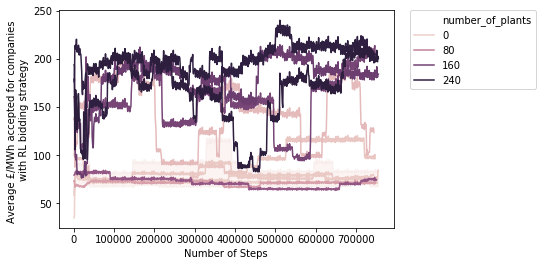

In [67]:
sns.lineplot(data=reward_df, x="Step", y="Value", hue="number_of_plants")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Number of Steps")
plt.ylabel("Average £/MWh accepted for companies \nwith RL bidding strategy")

Text(0, 0.5, 'Mean £/MWh accepted for companies \nwith RL bidding strategy')

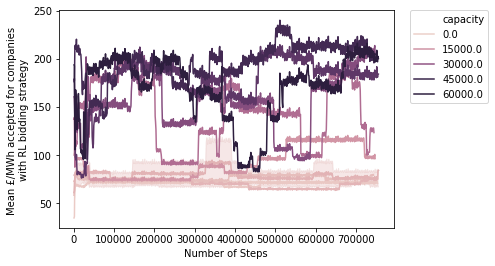

In [68]:
sns.lineplot(data=all_data, x="Step", y="Value", hue="capacity")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Number of Steps")
plt.ylabel("Mean £/MWh accepted for companies \nwith RL bidding strategy")

In [69]:
all_data[all_data.Step==all_data.Step.max()-10000]

,Wall time,Step,Value,number_of_plants,plant_names,capacity
744,1.591350e+09,745000,203.557007,216,EDF Energy_RWE Generation SE_SSE_Uniper UK Lim...,46929.2
2242,1.591350e+09,745000,184.645767,164,EDF Energy_RWE Generation SE_SSE_Uniper UK Lim...,38422.7
2997,1.591353e+09,745000,71.309349,49,Scottish power,4471.5
4489,1.591350e+09,745000,67.766663,11,Orsted,2738.7
4490,1.591350e+09,745000,67.766663,11,RWE Generation SE,8664.0
5995,1.591350e+09,745000,83.817368,11,Orsted,2738.7
5996,1.591350e+09,745000,83.817368,11,RWE Generation SE,8664.0
6761,1.591353e+09,745000,98.039192,14,EDF Energy,14763.0
7508,1.591354e+09,745000,203.929794,213,EDF Energy_RWE Generation SE_SSE_Uniper UK Lim...,42894.2
8253,1.591353e+09,745000,210.633392,155,EDF Energy_RWE Generation SE_SSE,31817.7


Text(0, 0.5, 'Average £/MWh accepted for companies \nwith RL bidding strategy')

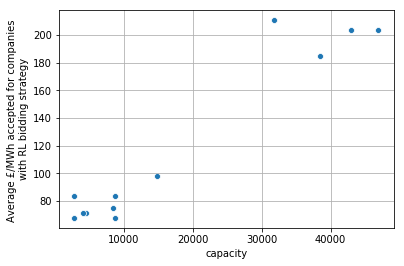

In [70]:
sns.scatterplot(data=all_data[all_data.Step==all_data.Step.max()-10000], x="capacity", y="Value")
plt.grid(b=True, which='major')
plt.ylabel("Average £/MWh accepted for companies \nwith RL bidding strategy")

# Visualising rewards for £150 bounded bids

In [71]:
path_150 = "/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/rl_rewards/bounded_150/*.csv"

rewards_list = []
for fname in glob.glob(path_150):
#     print(fname.split("/")[-1].split("_")[2])
    tmp_reward = pd.read_csv(fname)
    tmp_reward['number_of_plants'] = int(fname.split("/")[-1].split("_")[2])
#     print(tmp_reward)
    rewards_list.append(tmp_reward)
    
reward_df_150 = pd.concat(rewards_list)
reward_df_150

,Wall time,Step,Value,number_of_plants
0,1.591096e+09,1000,56.917171,3
1,1.591096e+09,2000,60.907692,3
2,1.591097e+09,3000,68.928467,3
3,1.591097e+09,4000,70.288109,3
4,1.591098e+09,5000,69.541504,3
...,...,...,...,...
459,1.591309e+09,460000,73.689980,9
460,1.591309e+09,461000,72.802795,9
461,1.591310e+09,462000,72.810471,9
462,1.591310e+09,463000,74.990089,9


In [72]:

all_data_150 = pd.merge(reward_df_150, relevant_plant_stats, on="number_of_plants")
all_data_150.to_csv("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/results/reward_df_150.csv")

all_data_150

,Wall time,Step,Value,number_of_plants,plant_names,capacity
0,1.591096e+09,1000,56.917171,3,Drax Power Ltd,4035.0
1,1.591096e+09,2000,60.907692,3,Drax Power Ltd,4035.0
2,1.591097e+09,3000,68.928467,3,Drax Power Ltd,4035.0
3,1.591097e+09,4000,70.288109,3,Drax Power Ltd,4035.0
4,1.591098e+09,5000,69.541504,3,Drax Power Ltd,4035.0
...,...,...,...,...,...,...
6488,1.591309e+09,460000,73.689980,9,Uniper UK Limited,6605.0
6489,1.591309e+09,461000,72.802795,9,Uniper UK Limited,6605.0
6490,1.591310e+09,462000,72.810471,9,Uniper UK Limited,6605.0
6491,1.591310e+09,463000,74.990089,9,Uniper UK Limited,6605.0


Text(0, 0.5, 'Average £/MWh accepted for companies \nwith RL bidding strategy')

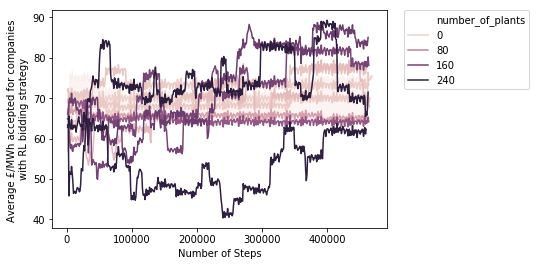

In [73]:
sns.lineplot(data=reward_df_150, x="Step", y="Value", hue="number_of_plants")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Number of Steps")
plt.ylabel("Average £/MWh accepted for companies \nwith RL bidding strategy")

Text(0, 0.5, 'Mean £/MWh accepted for companies \nwith RL bidding strategy')

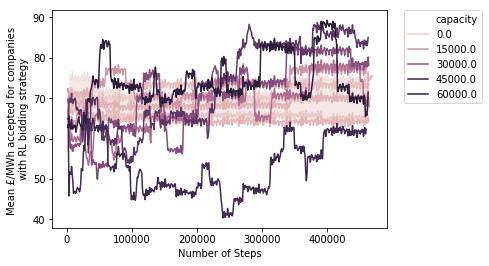

In [74]:
sns.lineplot(data=all_data_150, x="Step", y="Value", hue="capacity")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Number of Steps")
plt.ylabel("Mean £/MWh accepted for companies \nwith RL bidding strategy")

Text(0, 0.5, 'Average £/MWh accepted for companies \nwith RL bidding strategy')

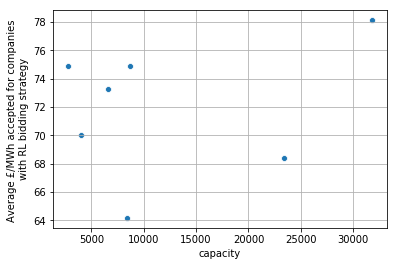

In [75]:
sns.scatterplot(data=all_data_150[all_data_150.Step==all_data_150.Step.max()-5000], x="capacity", y="Value")
plt.grid(b=True, which='major')
plt.ylabel("Average £/MWh accepted for companies \nwith RL bidding strategy")